## Task 2 :  Neurons in Conflict

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def sort_by_x(tup):
    return tup[0]    

In [3]:
def euclidean(u,v):
    return ((u[0]-v[0])**2 + (u[1]-v[1])**2)**0.5

In [11]:
def check_for_conflicts(nerves, conflict_radius):
    positions = sorted(nerves, key = sort_by_x) #Get positions sorted by x-coordinate
    s = set() #Empty set to count neurons accurately
    for ind in range(len(positions)-1):
        start = positions[ind] #First neuron at Start of the window
        nex = positions[ind+1] #First neuron to compare
        t = ind+1
        while nex[0] < start[0]+ (conflict_radius**2): #Keep comparing as long as the x-coordinate of the next neuron is lesser than conflict_radius squared
            if euclidean(start,nex)<conflict_radius: #Check the distance between the neurons
                s.add(tuple(start)) #Adding to set to ensure no duplicates 
                s.add(tuple(nex))
            #Check for next neurons
            t = t+1
            if t != len(positions): 
                nex = positions[t]
            else:
                break
    return  len(s), s #


In [12]:
def double_for(arr, radius):
    set_is  = set()
    for i in range(len(arr)):
        for j in range(len(arr)):
            if i!=j:
                dist = euclidean(arr[i], arr[j])
                if dist < radius:
                    set_is.add(i)
#                     set_is.add(j)
    return len(set_is), set_is

In [32]:
#Using Smaller numbers to visualize
import random
random.seed(8) 
NUM_NEURONS = 1000
NERVE_SIZE = 128000 # nanometers
CONFLICT_RADIUS = 500 # nanometers
    
def gen_coord ():
    # DO NOT MODIFY THIS FUNCTION
    return int(random.random() * NERVE_SIZE )

neuron_positions = [[ gen_coord () , gen_coord ()] for i in range ( NUM_NEURONS )]

In [33]:
%%time
n_conflicts, s = check_for_conflicts (neuron_positions ,CONFLICT_RADIUS)
print (" Neurons in conflict : {}". format ( n_conflicts ))

 Neurons in conflict : 61
Wall time: 1.08 s


In [34]:
%%time
n_conflicts, pos = double_for(neuron_positions ,CONFLICT_RADIUS)
print (" Neurons in conflict : {}". format ( n_conflicts ))

 Neurons in conflict : 61
Wall time: 1.27 s


### Visualize the points in conflict on a smaller scale

In [13]:
neu = np.array(neuron_positions)
s = np.array(list(s))

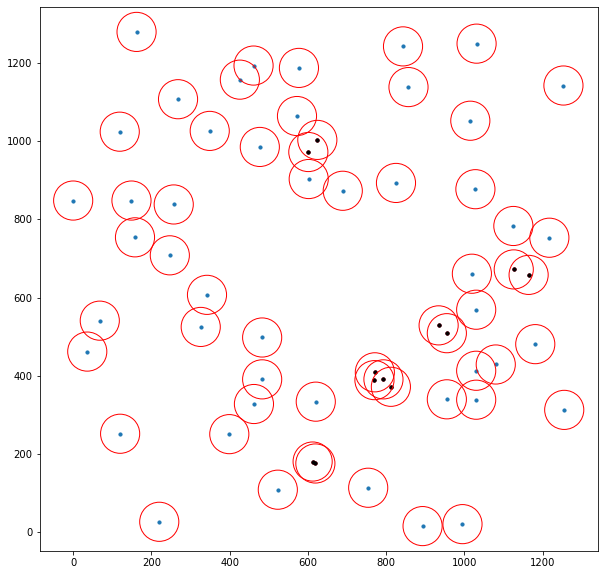

In [15]:

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(neu[:,0], neu[:,1], s=10)
ax.scatter(s[:,0], s[:,1], s=10, color='black')
for i in range(len(neu)):
    cir = plt.Circle((neu[i]), 50, color='r',fill=False)
    ax.set_aspect('equal', adjustable='datalim')
    ax.add_patch(cir)
plt.show()

### Compare time complexities

In [16]:
import time
N = [50,100,150,200,250,300,400,500,1000,1500,2000,2500,3000,4000,5000,10000]

In [24]:
NERVE_SIZE = 128000 # nanometers
CONFLICT_RADIUS = 5000 # nanometers

my_time = []
n2_time = []

my_ans = []
n2_ans = []

for i in N:
    NUM_NEURONS = i
    random.seed(random.randint(1,1000)) 
    neuron_positions = [[gen_coord(), gen_coord()] for i in range (NUM_NEURONS)]
    start = time.time()
    n_conflicts, s = check_for_conflicts (neuron_positions ,CONFLICT_RADIUS)
    my_time.append(time.time()-start)
    my_ans.append(n_conflicts)
    
    start = time.time()
    n_conflicts, s = double_for(neuron_positions ,CONFLICT_RADIUS)
    n2_time.append(time.time()-start)
    n2_ans.append(n_conflicts)
#     print(i)

10
50
100
150
200
250
300
400
500
1000
1500
2000
2500
3000
4000
5000
10000


In [28]:
my_ans == n2_ans

True

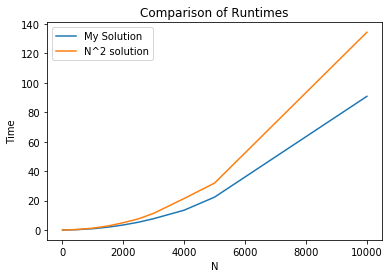

In [27]:
plt.plot(N, my_time)
plt.plot(N, n2_time)
plt.title('Comparison of Runtimes')
plt.ylabel('Time')
plt.xlabel('N')
plt.legend(['My Solution', 'N^2 solution'], loc='upper left')
plt.show()

Thus, its observed that the N.logN solution (as expected) starts to perform much better at higher N values.